# EDA

### import required packages

In [1]:

import pandas as pd # for data wrangling purpose
import numpy as np # Basic computation library
import seaborn as sns # For Visualization 
import matplotlib.pyplot as plt # ploting package
from sklearn.preprocessing import OneHotEncoder,MinMaxScaler,LabelEncoder

%matplotlib inline
import warnings # Filtering warnings
warnings.filterwarnings('ignore')

### load the data

In [2]:
df = pd.read_csv('updated_output10.csv')
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,Indigo,6E-716,Kolkata,Night,zero,Late_Night,Bangalore,Economy,2.75,11.0,5840.1000
1,Air India,AI-2401,Mumbai,Night,two_or_more,Afternoon,Delhi,Economy,15.17,44.0,19788.3400
2,Air_India,AI-402,Kolkata,Morning,one,Late_Night,Bangalore,Business,13.75,43.0,67075.8000
3,Vistara,UK-870,Hyderabad,Night,one,Evening,Mumbai,Business,19.92,18.0,106146.2307
4,GO_FIRST,G8-505,Chennai,Evening,one,Late_Night,Delhi,Economy,7.00,21.0,2983.2000


In [3]:
df.tail()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
49995,GO_FIRST,G8-334,Delhi,Early_Morning,one,Evening,Kolkata,Economy,9.50,34.0,7737.95
49996,Vistara,UK-776,Kolkata,Evening,one,Afternoon,Delhi,Economy,22.08,16.0,9568.35
49997,GO_FIRST,G8-319,Mumbai,Morning,one,Night,Bangalore,Economy,13.25,48.0,6319.00
49998,GO_FIRST,G8-171,Delhi,Evening,one,Early_Morning,Kolkata,Economy,13.25,37.0,8557.12
49999,Air_India,AI-804,Bangalore,Early_Morning,one,Evening,Hyderabad,Economy,35.42,49.0,12208.90


In [4]:
print('No of Rows:',df.shape[0])
print('No of Columns:',df.shape[1])

No of Rows: 50000
No of Columns: 11


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   airline           49530 non-null  object 
 1   flight            49530 non-null  object 
 2   source_city       49530 non-null  object 
 3   departure_time    49530 non-null  object 
 4   stops             49530 non-null  object 
 5   arrival_time      49530 non-null  object 
 6   destination_city  49530 non-null  object 
 7   class             49527 non-null  object 
 8   duration          49530 non-null  float64
 9   days_left         49604 non-null  float64
 10  price             49531 non-null  float64
dtypes: float64(3), object(8)
memory usage: 4.2+ MB


## Handling NA values

In [6]:
# check how many NA records are present
df.isna().sum()

airline             470
flight              470
source_city         470
departure_time      470
stops               470
arrival_time        470
destination_city    470
class               473
duration            470
days_left           396
price               469
dtype: int64

In [7]:
df.isnull().sum()

airline             470
flight              470
source_city         470
departure_time      470
stops               470
arrival_time        470
destination_city    470
class               473
duration            470
days_left           396
price               469
dtype: int64

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.isna().sum()

airline             39
flight              39
source_city         39
departure_time      39
stops               39
arrival_time        39
destination_city    39
class               42
duration            39
days_left            1
price               38
dtype: int64

In [10]:
df.dropna(inplace=True)

In [11]:
df.isna().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [12]:
df.describe()

,duration,days_left,price
count,49527.000000,49527.000000,49527.000000
mean,12.181146,26.047146,25535.737290
std,7.174562,13.541809,29313.888358
min,0.830000,1.000000,1013.018400
25%,6.750000,15.000000,5422.131000
50%,11.250000,26.000000,8762.784910
75%,16.080000,38.000000,48997.870095
max,47.750000,50.000000,189754.768600


### Data Integrity Check
#### Since dataset is large, Let check for any entry which is repeated or duplicated in dataset.

In [13]:
# View only the duplicate rows
duplicate_rows = df[df.duplicated()]
duplicate_rows.shape

(0, 11)

## Preprocessing

In [14]:
# Sort columns by datatypes
df.columns.to_series().groupby(df.dtypes).groups

{float64: ['duration', 'days_left', 'price'], object: ['airline', 'flight', 'source_city', 'departure_time', 'stops', 'arrival_time', 'destination_city', 'class']}

### Expected Datatypes
{int64: ['days_left', 'price'], float64: ['duration'], object: ['airline', 'flight', 'source_city', 'departure_time', 'stops', 'arrival_time', 'destination_city', 'class']}

In [15]:
# Spliting data into categorical and Numerical Variable
Numerical =['duration', 'days_left', 'price']

Categorical = [ 'airline', 'source_city', 'departure_time', 'stops', 'arrival_time', 'destination_city', 'class']

In [16]:
for i in Categorical:
    print('Unique value counts of ',i, 'Enlisted as Below Table :')
    print('-'*40)
    print(df[i].value_counts())
    print("*"*120)

Unique value counts of  airline Enlisted as Below Table :
----------------------------------------
airline
Vistara              21035
Air_India            13110
Indigo                7215
GO_FIRST              3794
AirAsia               2673
SpiceJet              1505
Air India              162
Air India Express       32
AkasaAir                 1
Name: count, dtype: int64
************************************************************************************************************************
Unique value counts of  source_city Enlisted as Below Table :
----------------------------------------
source_city
Delhi        10123
Mumbai       10046
Bangalore     8538
Kolkata       7658
Hyderabad     6579
Chennai       6497
Bengaluru       58
GOX             17
Goa             11
Name: count, dtype: int64
************************************************************************************************************************
Unique value counts of  departure_time Enlisted as Below Table :
-----

#### We also need to do some feature engineering on Source and Destination City columns, We can see at some place 'GOX' is mention and other places 'Goa' is mention.


In [17]:
# Replacing "GOX" as "Goa" in source_city column
df["source_city"] = df["source_city"].replace("GOX","Goa")
df['source_city'].value_counts()

source_city
Delhi        10123
Mumbai       10046
Bangalore     8538
Kolkata       7658
Hyderabad     6579
Chennai       6497
Bengaluru       58
Goa             28
Name: count, dtype: int64

In [18]:
df["source_city"] = df["source_city"].replace("Bengaluru","Bangalore")
df['source_city'].value_counts()

source_city
Delhi        10123
Mumbai       10046
Bangalore     8596
Kolkata       7658
Hyderabad     6579
Chennai       6497
Goa             28
Name: count, dtype: int64

In [19]:
df["airline"] = df["airline"].replace("Air_India","Air India")
df['airline'].value_counts()

airline
Vistara              21035
Air India            13272
Indigo                7215
GO_FIRST              3794
AirAsia               2673
SpiceJet              1505
Air India Express       32
AkasaAir                 1
Name: count, dtype: int64

In [20]:
# Replacing "GOX" as "Goa" in destination_city column
df["destination_city"] = df["destination_city"].replace("GOX","Goa")
df['destination_city'].value_counts()

destination_city
Mumbai       9735
Delhi        9615
Bangalore    8457
Kolkata      8231
Hyderabad    6870
Chennai      6571
Bengaluru      34
Goa            14
Name: count, dtype: int64

In [21]:
df["destination_city"] = df["destination_city"].replace("Bengaluru","Bangalore")
df['destination_city'].value_counts()

destination_city
Mumbai       9735
Delhi        9615
Bangalore    8491
Kolkata      8231
Hyderabad    6870
Chennai      6571
Goa            14
Name: count, dtype: int64

In [22]:
df = df[~df['class'].isin(['OperatedBy: Vistara', 'OperatedBy: Air India Express'])]

In [23]:
# remove the unwanted columns
df.drop(['flight'], axis=1, inplace=True)

In [24]:
df['days_left'] = df['days_left'].astype(int)
df['price'] = df['price'].astype(int)

In [25]:
df.columns.to_series().groupby(df.dtypes).groups

{int32: ['days_left', 'price'], float64: ['duration'], object: ['airline', 'source_city', 'departure_time', 'stops', 'arrival_time', 'destination_city', 'class']}

In [26]:
df.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,Indigo,Kolkata,Night,zero,Late_Night,Bangalore,Economy,2.75,11,5840
1,Air India,Mumbai,Night,two_or_more,Afternoon,Delhi,Economy,15.17,44,19788
2,Air India,Kolkata,Morning,one,Late_Night,Bangalore,Business,13.75,43,67075
3,Vistara,Hyderabad,Night,one,Evening,Mumbai,Business,19.92,18,106146
4,GO_FIRST,Chennai,Evening,one,Late_Night,Delhi,Economy,7.00,21,2983


In [27]:
# Exporting a single DataFrame to an Excel file
df.to_excel('output.xlsx', sheet_name='Sheet1', index=False)


In [28]:
for i in Categorical:
    print('Unique value counts of ',i, 'Enlisted as Below Table :')
    print('-'*40)
    print(df[i].value_counts())
    print("*"*120)

Unique value counts of  airline Enlisted as Below Table :
----------------------------------------
airline
Vistara              21035
Air India            13234
Indigo                7215
GO_FIRST              3794
AirAsia               2673
SpiceJet              1505
Air India Express       32
AkasaAir                 1
Name: count, dtype: int64
************************************************************************************************************************
Unique value counts of  source_city Enlisted as Below Table :
----------------------------------------
source_city
Delhi        10107
Mumbai       10044
Bangalore     8592
Kolkata       7652
Hyderabad     6577
Chennai       6496
Goa             21
Name: count, dtype: int64
************************************************************************************************************************
Unique value counts of  departure_time Enlisted as Below Table :
----------------------------------------
departure_time
Morning       

In [29]:
# As Airline is Nominal Categorical data we will perform OneHotEncoding
airline = df[["airline"]]
Current_airline_List = airline['airline']
New_airline_List = []

for carrier in Current_airline_List:
  if carrier in ['Vistara','Air_India','Indigo','GO_FIRST','AirAsia','SpiceJet','Air India','Air India Express']:
    New_airline_List.append(carrier)
  else:
    New_airline_List.append('Other')

airline['airline'] = pd.DataFrame(New_airline_List)
airline['airline'].value_counts()

airline
Vistara              20816
Air India            13096
Indigo                7139
GO_FIRST              3764
AirAsia               2645
SpiceJet              1492
Air India Express       31
Other                    1
Name: count, dtype: int64

In [30]:
df['airline'] = airline['airline']

In [31]:
df['airline'].value_counts()

airline
Vistara              20816
Air India            13096
Indigo                7139
GO_FIRST              3764
AirAsia               2645
SpiceJet              1492
Air India Express       31
Other                    1
Name: count, dtype: int64

In [32]:
df.describe()

,duration,days_left,price
count,49489.000000,49489.000000,49489.000000
mean,12.182872,26.049688,25539.652953
std,7.174551,13.541878,29323.481748
min,0.830000,1.000000,1013.000000
25%,6.750000,15.000000,5422.000000
50%,11.250000,26.000000,8761.000000
75%,16.080000,38.000000,49040.000000
max,47.750000,50.000000,189754.000000


In [33]:
df[Categorical].describe().T.style.background_gradient(cmap='summer_r')

,count,unique,top,freq
airline,48984,8,Vistara,20816
source_city,49489,7,Delhi,10107
departure_time,49489,6,Morning,11720
stops,49489,3,one,41196
arrival_time,49489,6,Night,14975
destination_city,49489,7,Mumbai,9726
class,49489,2,Economy,34214


#### Observation :
- The Minimum flight ticket price is Rs. 1013.00 and Maximum flight ticket price is Rs.189754.00.
- The ( mean > median ) for Price,Duration and departure_time which mean right skew data.
- Presense of outliers in Duration & Price columns as we see huge difference in 75% and max.
- High value of std. deviation indicating spread of data.
- There are 9 airline in dataset with maximum flight run by Vistara Airlines.
- Long route flight have atleast one 1 stop.

In [34]:
inputs_cols=['airline',  'source_city', 'departure_time','stops', 'arrival_time',
            'destination_city', 'class', 'duration','days_left' ]
targets_col='price'

In [35]:
Numerical =['duration', 'days_left', 'price']

Categorical = [ 'airline', 'source_city', 'departure_time', 'stops', 'arrival_time', 'destination_city', 'class']

## Removing outlier from duration

<Axes: >

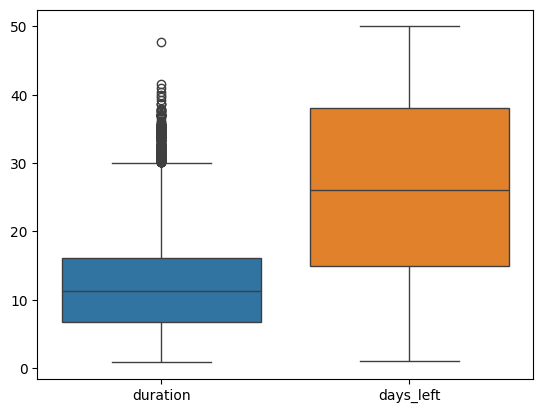

In [36]:
sns.boxplot(df[inputs_cols])

In [37]:
# remove the outlier
df = df[df.duration <=30]

In [38]:
# remove the outlier
df = df[df.price <=100000]

In [39]:
df

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,Indigo,Kolkata,Night,zero,Late_Night,Bangalore,Economy,2.75,11,5840
1,Air India,Mumbai,Night,two_or_more,Afternoon,Delhi,Economy,15.17,44,19788
2,Air India,Kolkata,Morning,one,Late_Night,Bangalore,Business,13.75,43,67075
4,GO_FIRST,Chennai,Evening,one,Late_Night,Delhi,Economy,7.00,21,2983
5,Vistara,Kolkata,Night,one,Evening,Hyderabad,Business,20.58,22,46487
...,...,...,...,...,...,...,...,...,...,...
49994,NaN,Bangalore,Evening,zero,Night,Kolkata,Economy,2.33,12,5637
49995,NaN,Delhi,Early_Morning,one,Evening,Kolkata,Economy,9.50,34,7737
49996,NaN,Kolkata,Evening,one,Afternoon,Delhi,Economy,22.08,16,9568
49997,NaN,Mumbai,Morning,one,Night,Bangalore,Economy,13.25,48,6319


<Axes: >

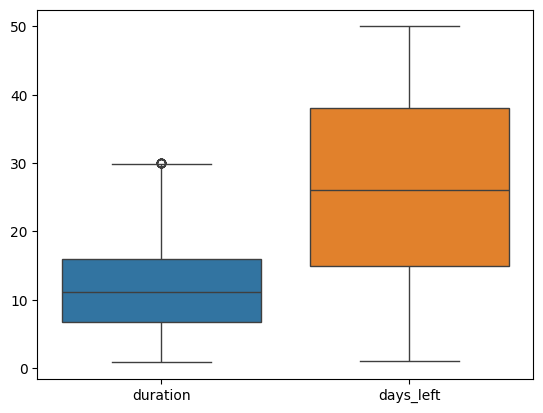

In [40]:
sns.boxplot(df[inputs_cols])

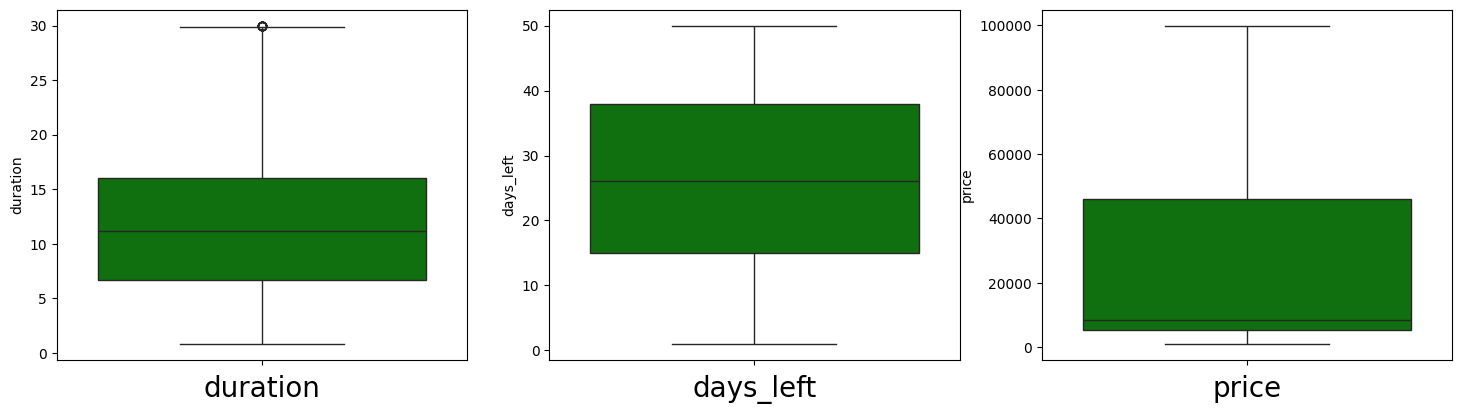

In [41]:
plt.figure(figsize=(18,10),facecolor='white')
plotnumber=1

for column in Numerical:
    if plotnumber<=6:
        ax=plt.subplot(2,3,plotnumber)
        sns.boxplot(df[column],color='g')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

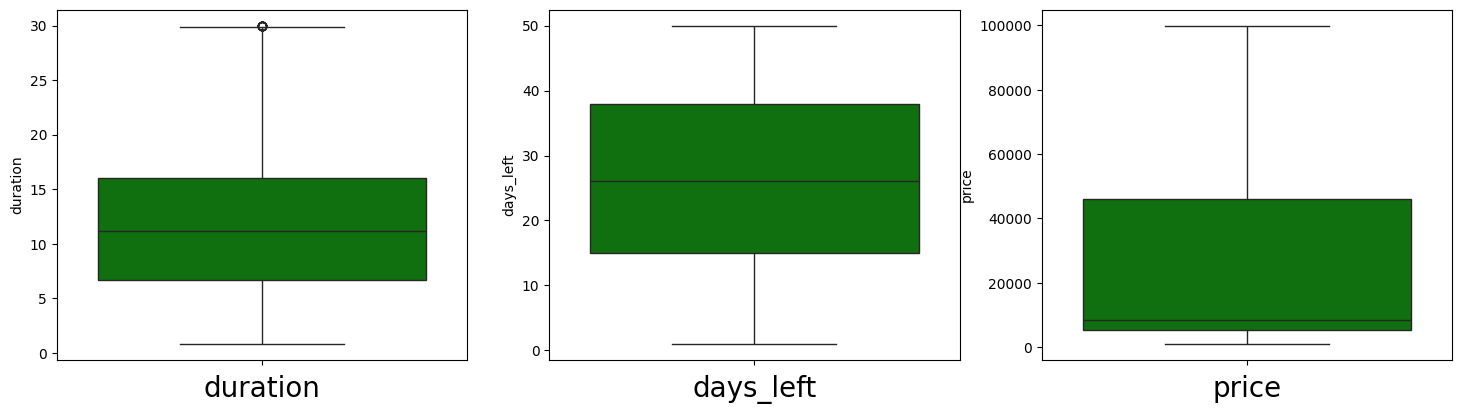

In [42]:
plt.figure(figsize=(18,10),facecolor='white')
plotnumber=1

for column in Numerical:
    if plotnumber<=6:
        ax=plt.subplot(2,3,plotnumber)
        sns.boxplot(df[column],color='g')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [43]:
df.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,Indigo,Kolkata,Night,zero,Late_Night,Bangalore,Economy,2.75,11,5840
1,Air India,Mumbai,Night,two_or_more,Afternoon,Delhi,Economy,15.17,44,19788
2,Air India,Kolkata,Morning,one,Late_Night,Bangalore,Business,13.75,43,67075
4,GO_FIRST,Chennai,Evening,one,Late_Night,Delhi,Economy,7.00,21,2983
5,Vistara,Kolkata,Night,one,Evening,Hyderabad,Business,20.58,22,46487


## Encoding

In [44]:
airline = df[["airline"]]
airline = pd.get_dummies(airline, drop_first= True, dtype=int) 
# drop_first= True means we drop the first column to prevent multicollinearity
airline.head()

,airline_Air India Express,airline_AirAsia,airline_GO_FIRST,airline_Indigo,airline_Other,airline_SpiceJet,airline_Vistara
0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0
5,0,0,0,0,0,0,1


In [45]:
# As Source is Nominal Categorical data we will perform OneHotEncoding
source_city = df[["source_city"]]
source_city = pd.get_dummies(source_city, drop_first= True, dtype=int) 
# drop_first= True means we drop the first column to prevent multicollinearity
source_city.head()

,source_city_Chennai,source_city_Delhi,source_city_Goa,source_city_Hyderabad,source_city_Kolkata,source_city_Mumbai
0,0,0,0,0,1,0
1,0,0,0,0,0,1
2,0,0,0,0,1,0
4,1,0,0,0,0,0
5,0,0,0,0,1,0


In [46]:
# As destination_city is Nominal Categorical data we will perform OneHotEncoding
destination_city = df[["destination_city"]]
destination_city = pd.get_dummies(destination_city, drop_first= True, dtype=int) 
# drop_first= True means we drop the first column to prevent multicollinearity
destination_city.head()


,destination_city_Chennai,destination_city_Delhi,destination_city_Goa,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai
0,0,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,0,0,0,0
4,0,1,0,0,0,0
5,0,0,0,1,0,0


In [47]:
df['stops'].value_counts()

stops
one            40187
zero            5946
two_or_more     2192
Name: count, dtype: int64

In [48]:
# As this is case of Ordinal Categorical type we perform LabelEncoder
# Here Values are assigned with corresponding keys
df.replace({"zero": 0, "one": 1, "2 stops": 2, "two_or_more": 3}, inplace = True)
df.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,Indigo,Kolkata,Night,0,Late_Night,Bangalore,Economy,2.75,11,5840
1,Air India,Mumbai,Night,3,Afternoon,Delhi,Economy,15.17,44,19788
2,Air India,Kolkata,Morning,1,Late_Night,Bangalore,Business,13.75,43,67075
4,GO_FIRST,Chennai,Evening,1,Late_Night,Delhi,Economy,7.00,21,2983
5,Vistara,Kolkata,Night,1,Evening,Hyderabad,Business,20.58,22,46487


In [49]:
import pickle

In [50]:
from sklearn.preprocessing import LabelEncoder

# encode the class Column
class_encoder = LabelEncoder()
class_encoder.fit(df['class'])
df['class'] = class_encoder.transform(df['class'])

# save the geography encoder 
with open("class_encoder.pkl", "wb") as file:
    pickle.dump(class_encoder, file)

In [51]:
from sklearn.preprocessing import LabelEncoder

# encode the class Column
departure_time_encoder = LabelEncoder()
departure_time_encoder.fit(df['departure_time'])
df['departure_time'] = departure_time_encoder.transform(df['departure_time'])

# save the geography encoder 
with open("departure_time_encoder.pkl", "wb") as file:
    pickle.dump(departure_time_encoder, file)

In [52]:
from sklearn.preprocessing import LabelEncoder

# encode the class Column
arrival_time_encoder = LabelEncoder()
arrival_time_encoder.fit(df['arrival_time'])
df['arrival_time'] = arrival_time_encoder.transform(df['arrival_time'])

# save the geography encoder 
with open("arrival_time_encoder.pkl", "wb") as file:
    pickle.dump(arrival_time_encoder, file)

In [53]:
# # Using Label Encoder on class variable
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# df['class'] = le.fit_transform(df['class'])
# df['departure_time'] = le.fit_transform(df['departure_time'])
# df['arrival_time'] = le.fit_transform(df['arrival_time'])
df.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,Indigo,Kolkata,5,0,3,Bangalore,1,2.75,11,5840
1,Air India,Mumbai,5,3,0,Delhi,1,15.17,44,19788
2,Air India,Kolkata,4,1,3,Bangalore,0,13.75,43,67075
4,GO_FIRST,Chennai,2,1,3,Delhi,1,7.00,21,2983
5,Vistara,Kolkata,5,1,2,Hyderabad,0,20.58,22,46487


In [54]:
df.drop(['airline','source_city','destination_city'],axis=1,inplace = True)

In [55]:
df.head()

,departure_time,stops,arrival_time,class,duration,days_left,price
0,5,0,3,1,2.75,11,5840
1,5,3,0,1,15.17,44,19788
2,4,1,3,0,13.75,43,67075
4,2,1,3,1,7.00,21,2983
5,5,1,2,0,20.58,22,46487


In [56]:
final_df = pd.concat([df,airline,source_city,destination_city],axis=1)
final_df.head()

,departure_time,stops,arrival_time,class,duration,days_left,price,airline_Air India Express,airline_AirAsia,airline_GO_FIRST,...,source_city_Goa,source_city_Hyderabad,source_city_Kolkata,source_city_Mumbai,destination_city_Chennai,destination_city_Delhi,destination_city_Goa,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai
0,5,0,3,1,2.75,11,5840,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,5,3,0,1,15.17,44,19788,0,0,0,...,0,0,0,1,0,1,0,0,0,0
2,4,1,3,0,13.75,43,67075,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,2,1,3,1,7.00,21,2983,0,0,1,...,0,0,0,0,0,1,0,0,0,0
5,5,1,2,0,20.58,22,46487,0,0,0,...,0,0,1,0,0,0,0,1,0,0


In [57]:
final_df.shape

(48325, 26)

In [58]:
final_df.columns

Index(['departure_time', 'stops', 'arrival_time', 'class', 'duration',
       'days_left', 'price', 'airline_Air India Express', 'airline_AirAsia',
       'airline_GO_FIRST', 'airline_Indigo', 'airline_Other',
       'airline_SpiceJet', 'airline_Vistara', 'source_city_Chennai',
       'source_city_Delhi', 'source_city_Goa', 'source_city_Hyderabad',
       'source_city_Kolkata', 'source_city_Mumbai', 'destination_city_Chennai',
       'destination_city_Delhi', 'destination_city_Goa',
       'destination_city_Hyderabad', 'destination_city_Kolkata',
       'destination_city_Mumbai'],
      dtype='object')

In [59]:
x = final_df.drop('price',axis=1)
y = final_df['price']

In [60]:
print(x.shape, y.shape)

(48325, 25) (48325,)


## Spliting data into train,test data

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
x_train, x_test, y_train, y_test =  train_test_split(x, y, train_size=0.7,random_state=42)
print('Training feature matrix size:',x_train.shape)
print('Training target vector size:',y_train.shape)
print('Test feature matrix size:',x_test.shape)
print('Test target vector size:',y_test.shape)

Training feature matrix size: (33827, 25)
Training target vector size: (33827,)
Test feature matrix size: (14498, 25)
Test target vector size: (14498,)


## Applying Different Models

In [63]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  Ridge
from sklearn.linear_model import  Lasso
from xgboost import XGBRegressor

## Linear Regression Base Model

In [64]:
# create the model
model = LinearRegression()

# train the model
model.fit(x_train, y_train)

LinearRegression()

In [65]:
y_pred=model.predict(x_test)

In [66]:
model.predict(x_test)

array([ 6723.9536315 , 60614.47745006,  7811.62816895, ...,
       60532.93211572, 65874.64585358,  9185.67712318])

In [67]:
print('\033[1m'+' Error :'+'\033[0m')
print('Mean absolute error :', mean_absolute_error(y_test,y_pred))
print('Mean squared error :', mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test,y_pred)))
print('\n')
from sklearn.metrics import r2_score
print('\033[1m'+' R2 Score :'+'\033[0m')
print(r2_score(y_test,y_pred,multioutput='variance_weighted'))

 Error :
Mean absolute error : 6081.772127926726
Mean squared error : 90271335.02707997
Root Mean Squared Error: 9501.122829807011


 R2 Score :
0.8785227231421693


## Pick Best model for this dataset¶

In [68]:
# # pick different model and test which is better 
# Linear_reg = LinearRegression(),
# Ride_reg= Ridge()
# XGBoost = XGBRegressor()
# Random_forest = RandomForestRegressor()
# Ada_boost = AdaBoostRegressor()
# Grad_boost = GradientBoostingRegressor()

In [1]:
# pick different model and test which is better 

Linear_reg = LinearRegression(),
Ride_reg= Ridge()
XGBoost = XGBRegressor()
Random_forest = RandomForestRegressor()
Ada_boost = AdaBoostRegressor()
Grad_boost = GradientBoostingRegressor()
model_li = [Ride_reg,XGBoost,Random_forest,Ada_boost,Grad_boost]
for model in model_li:
    model.fit(x_train,y_train)
    model.score(x_train,y_train)
    y_pred = model.predict(x_test)
    print('\n')                                        
    print('\033[1m'+' Error of ', model, ':' +'\033[0m')
    print('Mean absolute error :', mean_absolute_error(y_test,y_pred))
    print('Mean squared error :', mean_squared_error(y_test,y_pred))
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test,y_pred)))
    print('\n')

    print('\033[1m'+' R2 Score for test data:'+'\033[0m')
    print(r2_score(y_test,y_pred)) 
    print('==============================================================================================================')

NameError: name 'LinearRegression' is not defined

In [70]:
# our Final Model  
final_model = RandomForestRegressor()
final_model.fit(x_train,y_train)
print("The R2 score of Random Forest : ",r2_score(y_test,Random_forest.predict(x_test)))

The R2 score of Random Forest :  0.9284307535450818


### Save the model

<!-- ## Standard Scaling -->

In [71]:
import pickle

with open("Flight_Fare_Prediction_Model.pkl", "wb") as file:
    pickle.dump(final_model, file)

In [72]:
# sns.boxplot(df[inputs_cols])

In [73]:
# from sklearn.preprocessing import StandardScaler
# scaler= StandardScaler()
# array_scaled = scaler.fit_transform(df[inputs_cols])

In [74]:
# sns.boxplot(df[inputs_cols])

In [75]:
# scaler = MinMaxScaler()
# scaler.fit(df[inputs_cols])
# df[inputs_cols] = scaler.transform(df[inputs_cols])

In [76]:
# sns.boxplot(df[inputs_cols])

In [77]:
# df.corr()

In [78]:
# plt.figure(figsize=(25,15))
# sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
#             annot_kws={'size':10}, cmap="gist_stern")
# plt.xticks(fontsize=12)
# plt.yticks(fontsize=12)
# plt.show()

In [79]:
# from sklearn.linear_model import LinearRegression
# from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.tree import DecisionTreeRegressor
# import xgboost as xgb
# from sklearn.ensemble import ExtraTreesRegressor
# from sklearn.svm import SVR
# from sklearn.ensemble import AdaBoostRegressor
# from sklearn.ensemble import  GradientBoostingRegressor
# from sklearn.neighbors import KNeighborsRegressor
# from sklearn.metrics import mean_squared_error, mean_absolute_error
# from sklearn.metrics import r2_score
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import  Ridge
# from sklearn.linear_model import  Lasso
# from xgboost import XGBRegressor

<!-- ## Spliting data into train,test data -->

In [80]:
# x = df.drop(['price'],axis=1)
# y = df['price']

In [81]:
# x.tail()

In [82]:
# y.head()

In [83]:
# x.describe()

In [84]:
# x_train, x_test, y_train, y_test =  train_test_split(x, y, train_size=0.7,random_state=42)
# print('Training feature matrix size:',x_train.shape)
# print('Training target vector size:',y_train.shape)
# print('Test feature matrix size:',x_test.shape)
# print('Test target vector size:',y_test.shape)

<!-- ## Linear Regression Base Model -->

In [85]:
# # create the model
# model = LinearRegression()

# # train the model
# model.fit(x_train, y_train)

In [86]:
# y_pred=model.predict(x_test)

In [87]:
# model.predict(x_test)

In [88]:
# print('\033[1m'+' Error :'+'\033[0m')
# print('Mean absolute error :', mean_absolute_error(y_test,y_pred))
# print('Mean squared error :', mean_squared_error(y_test,y_pred))
# print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test,y_pred)))
# print('\n')
# from sklearn.metrics import r2_score
# print('\033[1m'+' R2 Score :'+'\033[0m')
# print(r2_score(y_test,y_pred,multioutput='variance_weighted'))

<!-- ## Pick Best model for this dataset¶ -->

In [89]:
# # pick different model and test which is better 
# Linear_reg = LinearRegression(),
# Ride_reg= Ridge()
# XGBoost = XGBRegressor()
# Random_forest = RandomForestRegressor()
# Ada_boost = AdaBoostRegressor()
# Grad_boost = GradientBoostingRegressor()

In [90]:
# Linear_reg = LinearRegression(),
# Ride_reg= Ridge()
# XGBoost = XGBRegressor()
# Random_forest = RandomForestRegressor()
# Ada_boost = AdaBoostRegressor()
# Grad_boost = GradientBoostingRegressor()
# model_li = [Ride_reg,XGBoost,Random_forest,Ada_boost,Grad_boost]
# for model in model_li:
#     model.fit(x_train,y_train)
#     model.score(x_train,y_train)
#     y_pred = model.predict(x_test)
#     print('\n')                                        
#     print('\033[1m'+' Error of ', model, ':' +'\033[0m')
#     print('Mean absolute error :', mean_absolute_error(y_test,y_pred))
#     print('Mean squared error :', mean_squared_error(y_test,y_pred))
#     print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test,y_pred)))
#     print('\n')

#     print('\033[1m'+' R2 Score for test data:'+'\033[0m')
#     print(r2_score(y_test,y_pred)) 
#     prediction = model.predict([[0.777778,0.375,0.4,1.0,1.0,1.0,1.0,0.045938,0.0]])
#     print('Prediction =',prediction)
#     print('==============================================================================================================')

In [91]:
# Linear_reg = LinearRegression(),
# Ride_reg= Ridge()
# XGBoost = XGBRegressor()
# Random_forest = RandomForestRegressor()
# Ada_boost = AdaBoostRegressor()
# Grad_boost = GradientBoostingRegressor()
# model_li = [Ride_reg,XGBoost,Random_forest,Ada_boost,Grad_boost]
# for model in model_li:
#     model.fit(x_train,y_train)
#     model.score(x_train,y_train)
#     y_pred = model.predict(x_train)
#     print('\n')                                        
#     print('\033[1m'+' Error of ', model, ':' +'\033[0m')
#     print('Mean absolute error :', mean_absolute_error(y_train,y_pred))
#     print('Mean squared error :', mean_squared_error(y_train,y_pred))
#     print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_train,y_pred)))
#     print('\n')

#     print('\033[1m'+' R2 Score for train data :'+'\033[0m')
#     print(r2_score(y_train,y_pred)) 
#     print('==============================================================================================================')

In [92]:
# x.head()

In [93]:
# model1 = RandomForestRegressor()
# model1.fit(x_train,y_train)
# model1.score(x_train,y_train)
# y_pred = model1.predict(x_train)
# print('\n')                                        
# print('\033[1m'+' Error of ', model1, ':' +'\033[0m')
# print('Mean absolute error :', mean_absolute_error(y_train,y_pred))
# print('Mean squared error :', mean_squared_error(y_train,y_pred))
# print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_train,y_pred)))
# print('\n')

# print('\033[1m'+' R2 Score for train data :'+'\033[0m')
# print(r2_score(y_train,y_pred)) 

In [94]:
# prediction1 = model1.predict([[0.777778,0.375,0.4,1.0,1.0,1.0,1.0,0.045938,0.0]])
# prediction1

In [95]:
# prediction2 = model1.predict([[0.777778,0.375,0.2,1.0,0.8,1.0,1.0,0.051423,0.0]])
# prediction2

In [96]:
# prediction3 = model1.predict([[0.111111,0.25,1.0,0.5,0.8,0.750,1.0,0.348646,0.877551]])
# prediction3

<!-- # Regression using DL -->